# 使用决策树预测糖尿病
数据源: https://www.kaggle.com/uciml/pima-indians-diabetes-database#diabetes.csv

注意: 需要使用如下命令安装额外两个包用于画图

conda install python-graphviz

conda install pydotplus

In [1]:
# 导入数据包
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 选择预测所需的特征
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # 特征
y = pima.label # 类别标签

In [5]:
# 将数据分为训练和测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [6]:
# 创建决策树分类器
clf = DecisionTreeClassifier(criterion='entropy')

# 训练模型
clf = clf.fit(X_train,y_train)

# 使用训练好的模型做预测
y_pred = clf.predict(X_test)

In [7]:
# 模型的准确性?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7445887445887446


## 可视化训练好的决策树模型

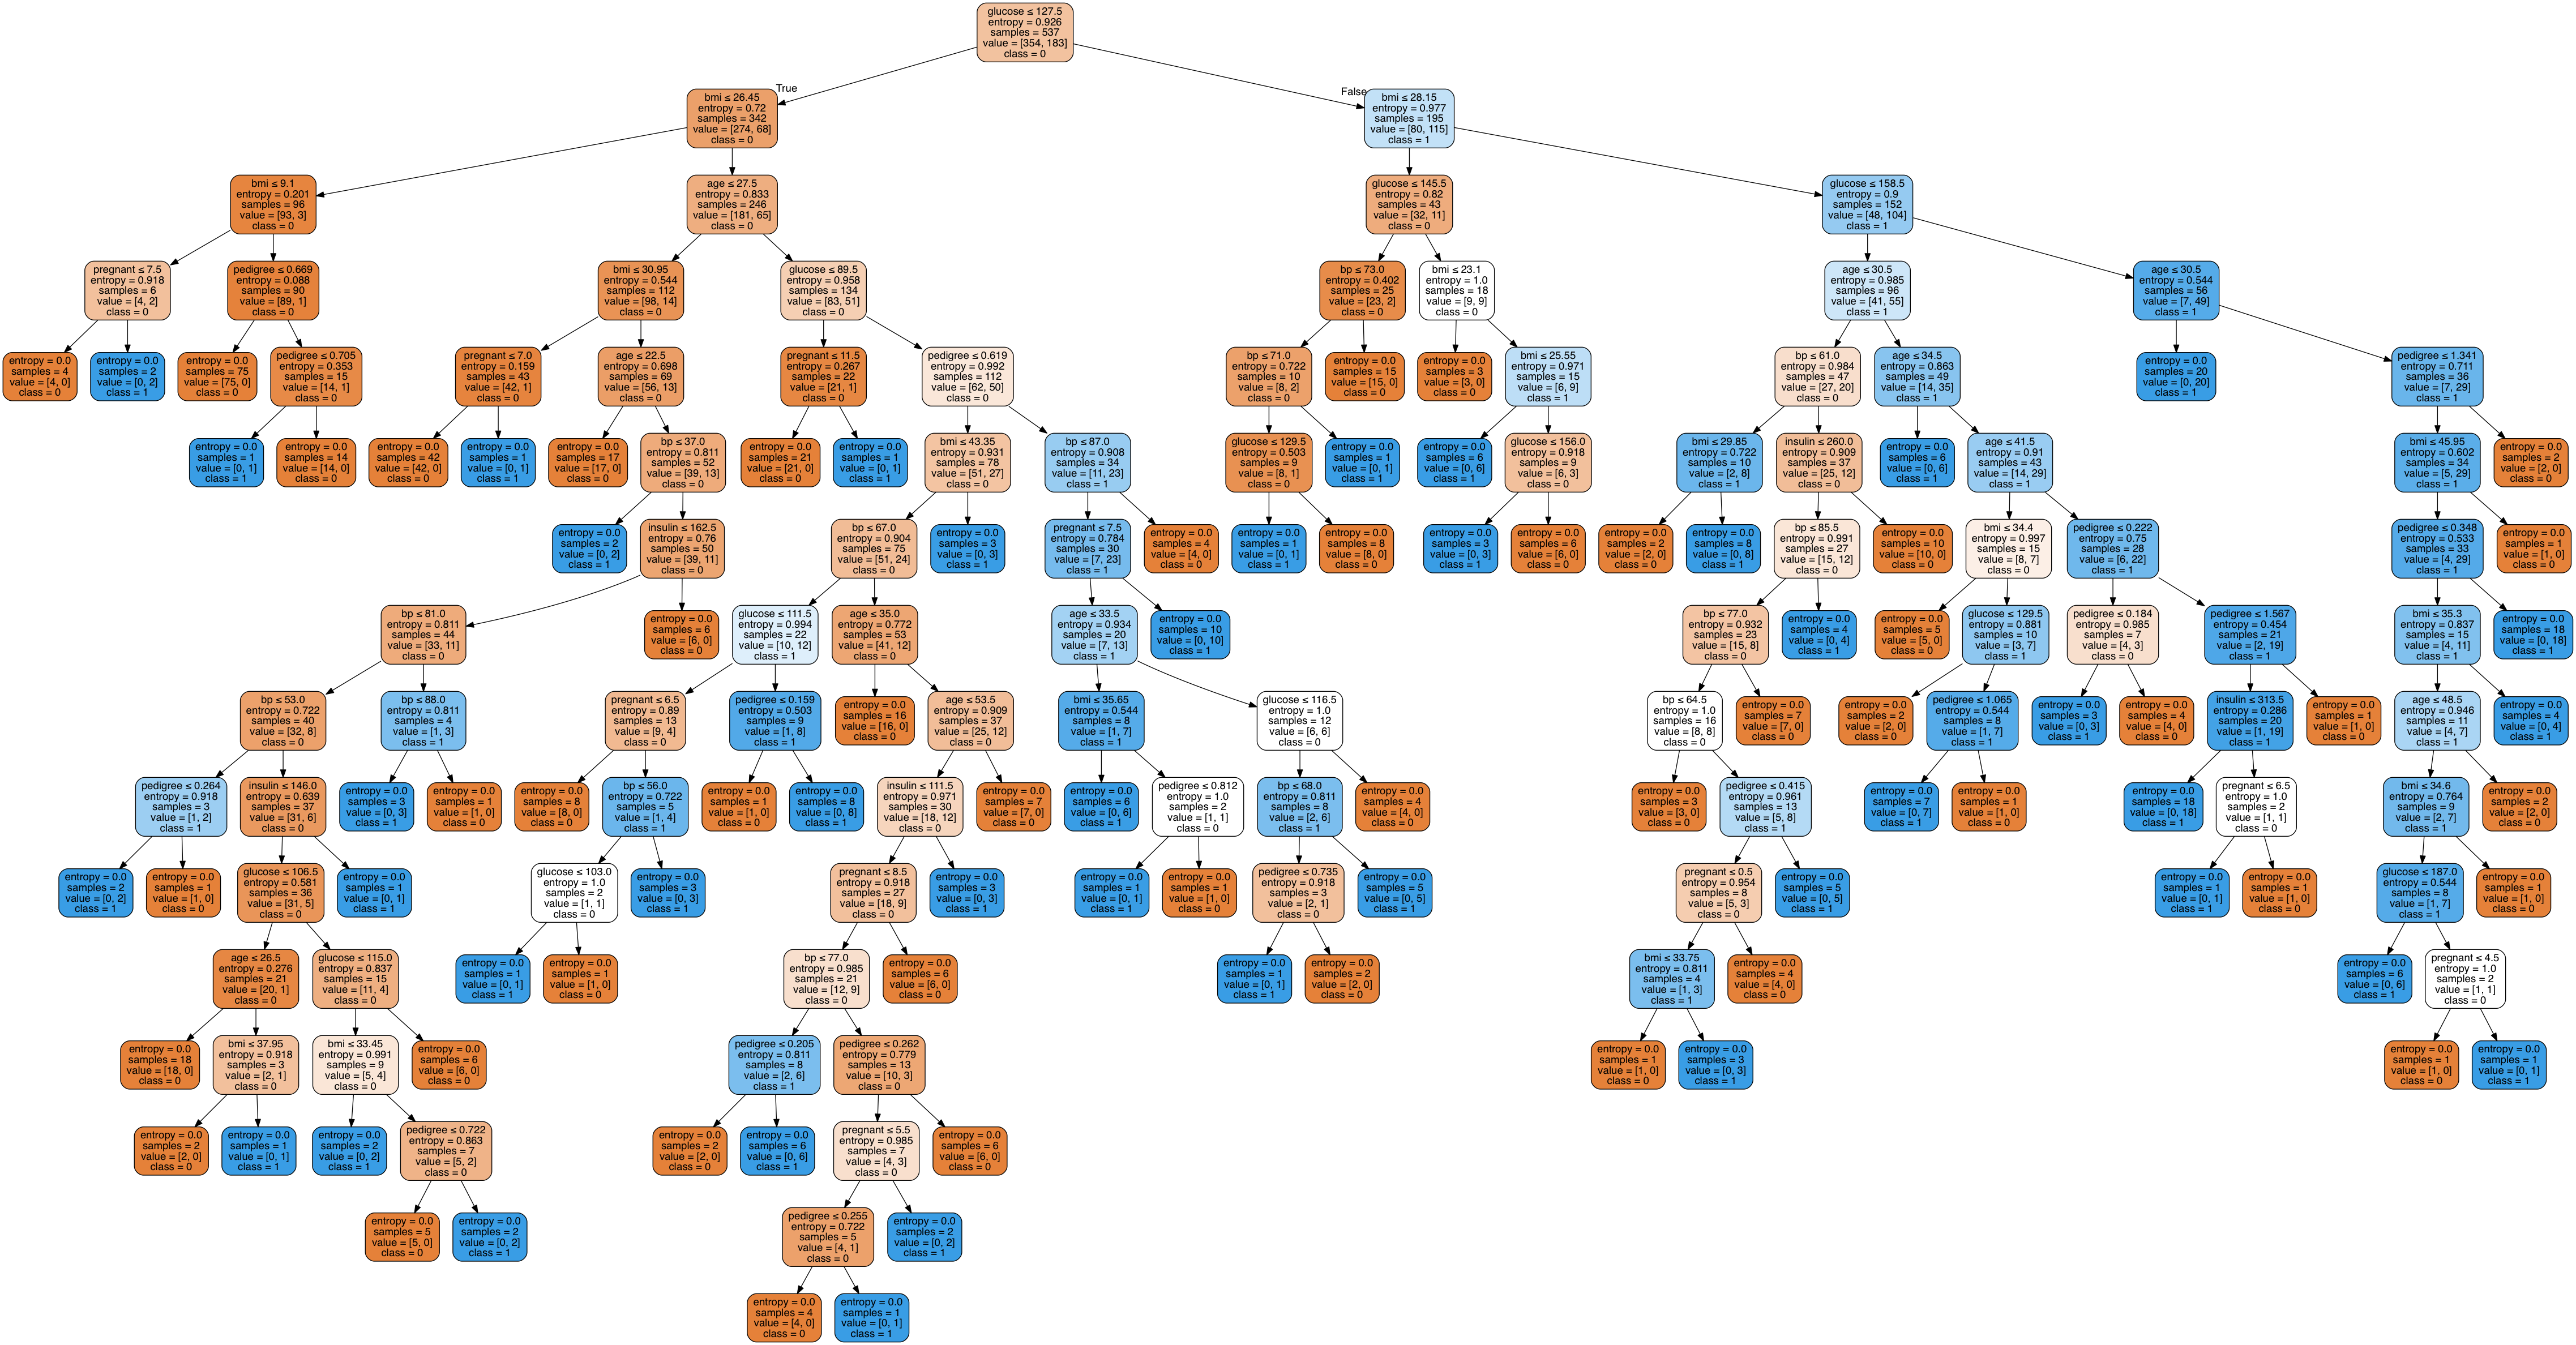

In [8]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [29]:
# 创建新的决策树, 限定树的最大深度, 减少过拟合
clf = 

# 训练模型
clf = 

# 预测
y_pred = clf.predict(X_test)

# 模型的性能
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [30]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

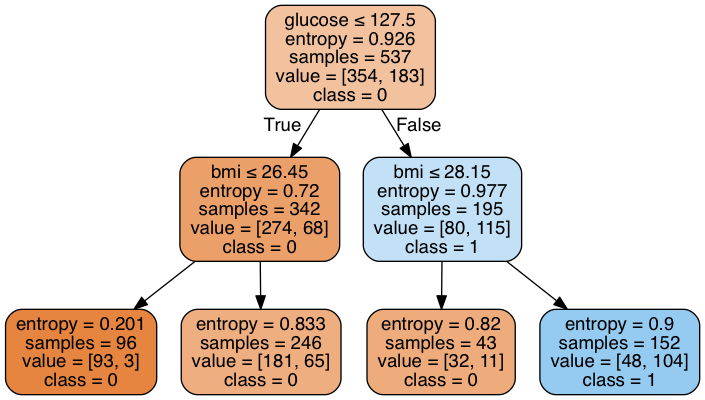

In [31]:
graph.write_png('diabetes2.png')
Image(graph.create_png())

## 使用随机森林做预测

In [2]:
from sklearn.ensemble import RandomForestClassifier

# 随机森林, 通过调整参数来获取更好的结果
rf = RandomForestClassifier(
    criterion='entropy',
    n_estimators=100, 
    max_depth=None, # 定义树的深度, 可以用来防止过拟合
    min_samples_split=10, # 定义至少多少个样本的情况下才继续分叉
    #min_weight_fraction_leaf=0.02 # 定义叶子节点最少需要包含多少个样本(使用百分比表达), 防止过拟合
    )

# 训练模型
rf.fit(X_train, y_train)

# 做预测
y_pred = rf.predict(X_test)

# 模型的准确率
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


NameError: name 'X_train' is not defined